`Winsorization` is a statistical technique used to remove outliers from a dataset by replacing extreme values with a specified percentile of the data, essentially "capping" the outliers instead of completely removing them, thus reducing their impact on analysis without losing all the data points; it's a method of handling outliers by limiting their influence rather than deleting them completely.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
import seaborn as sns

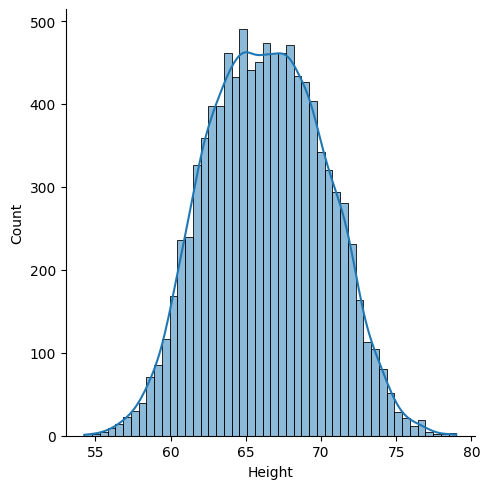

In [8]:
sns.displot(data=df, x='Height', kde=True)

<Axes: xlabel='Height'>

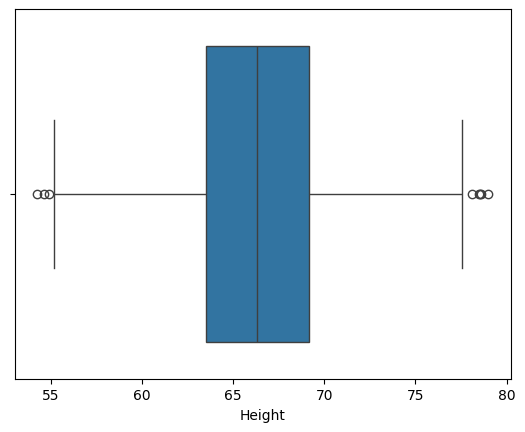

In [9]:
sns.boxplot(data=df, x='Height')

#### The technique is in upper how much cut the in the lower part will be same cutting
.99---1%

.01---1%

In [10]:
upper_limit = df['Height'].quantile(.99)
lower_limit = df['Height'].quantile(.01)
upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

## Filtering the outlier value

In [12]:
df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## Data is without outlier

In [15]:
new_df = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]
new_df.shape

(9800, 3)

In [16]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [17]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

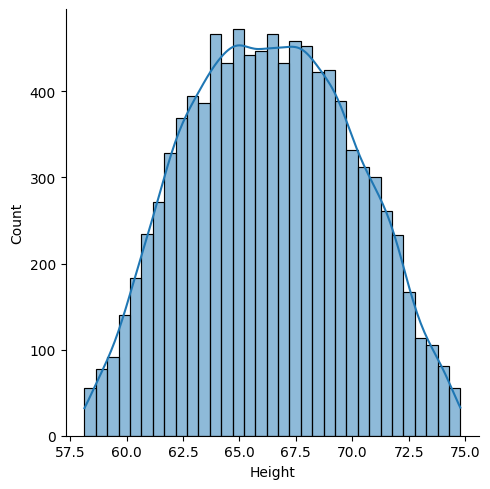

In [18]:
sns.displot(data=new_df, x='Height', kde=True)

<Axes: xlabel='Height'>

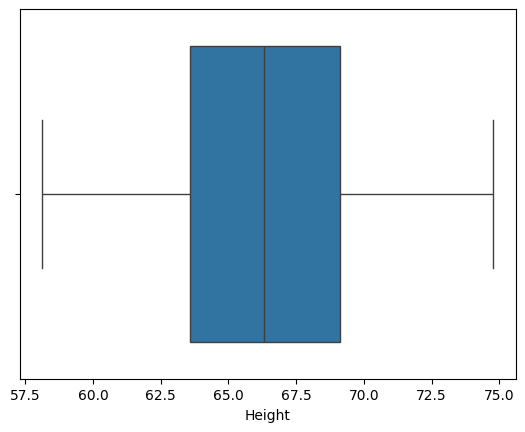

In [20]:
sns.boxplot(data=new_df, x="Height")

In [21]:
## Capping -- Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
                        upper_limit,
                        np.where(df['Height'] <= lower_limit,
                                 lower_limit,
                                 df['Height']
                        
                                 )
                        )

In [22]:
df.shape

(10000, 3)

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

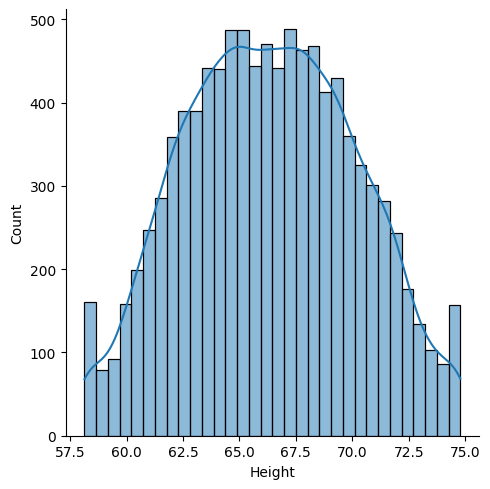

In [24]:
sns.displot(data=df, x='Height', kde=True)

<Axes: xlabel='Height'>

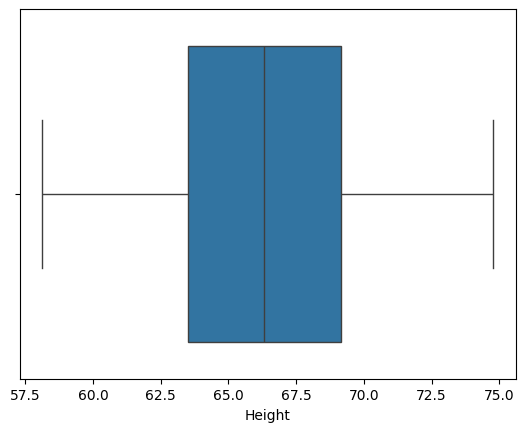

In [25]:
sns.boxplot(data=df, x="Height")